In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
pop = pd.read_csv(f'/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu et al code and dataset /Code&Data for results/Data/SSP datasets/Population/pop.csv')

pop

,SSPs,Year,sex,Population,iso_code,age
0,SSP2,2020,m,3231.9,AFG,0
1,SSP2,2025,m,3527.3,AFG,0
2,SSP2,2030,m,3773.0,AFG,0
3,SSP2,2035,m,3943.3,AFG,0
4,SSP2,2040,m,4075.3,AFG,0
...,...,...,...,...,...,...
717565,SSP5,2080,f,8.3,ZWE,100
717566,SSP5,2085,f,15.4,ZWE,100
717567,SSP5,2090,f,22.0,ZWE,100
717568,SSP5,2095,f,31.3,ZWE,100


In [4]:
pop_all = pop.groupby(['SSPs', 'Year', 'iso_code','sex'])['Population'].sum().reset_index()

pop_all.columns = ['scen', 'Time', 'iso_code','sex','Population_total']

pop_all

,scen,Time,iso_code,sex,Population_total
0,SSP1,2020,ABW,f,56.4
1,SSP1,2020,ABW,m,50.1
2,SSP1,2020,AFG,f,18957.4
3,SSP1,2020,AFG,m,19368.5
4,SSP1,2020,AGO,f,16644.4
...,...,...,...,...,...
34165,SSP5,2100,ZAF,m,25518.3
34166,SSP5,2100,ZMB,f,18062.9
34167,SSP5,2100,ZMB,m,17281.1
34168,SSP5,2100,ZWE,f,9565.1


# Cumulative Premature Deaths

In [3]:
change_cumu_deaths_fill = pd.read_csv('/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu_et_al_code_and_dataset /Code&Data for results/Data/Health outcomes/Premature Deaths/change_cumu_deaths_fill.csv').replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

change_cumu_deaths_fill

,SSPs,Year,sex,iso_code,age,mx,Scenario,Population,COP_delta_mort_AVG_adjusted,COP_delta_mort_LOW_adjusted,...,LUN_delta_mort_HIGH_diff,STR_delta_mort_AVG_diff,STR_delta_mort_LOW_diff,STR_delta_mort_HIGH_diff,TDM_delta_mort_AVG_diff,TDM_delta_mort_LOW_diff,TDM_delta_mort_HIGH_diff,total_delta_mort_AVG_diff,total_delta_mort_LOW_diff,total_delta_mort_HIGH_diff
0,SSP1,2020,f,AFG,0.0,0.011760,SSP1-1.9,3087.40,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,SSP1,2021,f,AFG,0.0,0.011089,SSP1-1.9,3101.88,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.002506,-0.000021,-0.007346
2,SSP1,2022,f,AFG,0.0,0.010417,SSP1-1.9,3116.36,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.005012,-0.000041,-0.014692
3,SSP1,2023,f,AFG,0.0,0.009746,SSP1-1.9,3130.84,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.007518,-0.000062,-0.022039
4,SSP1,2024,f,AFG,0.0,0.009074,SSP1-1.9,3145.32,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.010024,-0.000083,-0.029385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972211,SSP3,2046,m,ZWE,100.0,0.482033,SSP3-7.0,0.10,0.000053,0.000036,...,1.458089e-07,0.000003,0.000002,0.000005,0.000002,5.125166e-07,0.000003,0.000057,0.000006,0.000157
972212,SSP3,2047,m,ZWE,100.0,0.481921,SSP3-7.0,0.10,0.000054,0.000037,...,1.441616e-07,0.000003,0.000002,0.000005,0.000001,4.958434e-07,0.000003,0.000056,0.000006,0.000153
972213,SSP3,2048,m,ZWE,100.0,0.481810,SSP3-7.0,0.10,0.000055,0.000038,...,1.425144e-07,0.000003,0.000002,0.000004,0.000001,4.791702e-07,0.000003,0.000054,0.000006,0.000149
972214,SSP3,2049,m,ZWE,100.0,0.481698,SSP3-7.0,0.10,0.000057,0.000039,...,1.408672e-07,0.000003,0.000002,0.000004,0.000001,4.624970e-07,0.000003,0.000053,0.000005,0.000145


# Life Expectancy at Birth

In [6]:
leab = pd.read_csv('/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu et al code and dataset /Code&Data for results/Data/Health outcomes/Life Expectancy/leab.csv')

leab = leab.merge(pop_all,on=['scen', 'Time', 'iso_code','sex'],how='left')

leab

,scen,Time,sex,agest,iso_code,Scenario,ex,ex.new_AVG,ex.new_LOW,ex.new_HIGH,ex_diff_AVG,ex_diff_LOW,ex_diff_HIGH,Population_total
0,SSP1,2020.0,f,0,AFG,ssp119,65.431991,65.431990,65.431990,65.431990,-5.518742e-07,-5.518743e-07,-5.518742e-07,18957.4
1,SSP1,2025.0,f,0,AFG,ssp119,68.461696,68.622891,68.527668,68.767564,1.611945e-01,6.597164e-02,3.058678e-01,21676.2
2,SSP1,2030.0,f,0,AFG,ssp119,69.747324,69.880055,69.800141,70.003453,1.327315e-01,5.281701e-02,2.561291e-01,24380.3
3,SSP1,2035.0,f,0,AFG,ssp119,71.029809,71.125210,71.067723,71.216743,9.540132e-02,3.791385e-02,1.869339e-01,26966.3
4,SSP1,2040.0,f,0,AFG,ssp119,72.227582,72.409434,72.297581,72.593215,1.818513e-01,6.999868e-02,3.656327e-01,29377.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10491,SSP3,2030.0,m,0,ZWE,ssp370,55.744436,55.708408,55.734799,55.671117,-3.602813e-02,-9.637199e-03,-7.331932e-02,8882.4
10492,SSP3,2035.0,m,0,ZWE,ssp370,56.193848,56.183074,56.190928,56.173299,-1.077408e-02,-2.920066e-03,-2.054928e-02,9673.0
10493,SSP3,2040.0,m,0,ZWE,ssp370,56.624089,56.561985,56.607761,56.499813,-6.210442e-02,-1.632834e-02,-1.242763e-01,10454.4
10494,SSP3,2045.0,m,0,ZWE,ssp370,57.042715,56.927719,57.013094,56.805294,-1.149960e-01,-2.962166e-02,-2.374215e-01,11188.4


In [7]:
leab_global_2020 = leab[leab['Time'] == 2020].groupby(['Scenario']).apply(
    lambda group: pd.Series({
        'weighted_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),

    })
).reset_index()

leab_global_2050 = leab[leab['Time'] == 2050].groupby(['Scenario']).apply(
    lambda group: pd.Series({
        'weighted_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_LOW': (group['ex.new_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_HIGH': (group['ex.new_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum(),

    })
).reset_index()

leab_global_diff = leab[leab['Time'] == 2050].groupby(['Scenario']).apply(
    lambda group: pd.Series({
        'weighted_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_LOW': (group['ex.new_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_HIGH': (group['ex.new_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum(),
    })
).reset_index()

leab_global_combined = pd.merge(
    leab_global_2020, leab_global_2050, 
    on=['Scenario'], 
    suffixes=('_2020', '_2050')
)

leab_global_combined = leab_global_combined.replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

leab_global_combined


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_99344/911384411.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  leab_global_2020 = leab[leab['Time'] == 2020].groupby(['Scenario']).apply(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_99344/911384411.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  leab_global_2050 = leab[leab['Time'] == 2050].groupby(['Scenario']).apply(
/var/f

,Scenario,weighted_ex_2020,weighted_ex.new_AVG_2020,weighted_ex_2050,weighted_ex.new_AVG_2050,weighted_ex.new_LOW,weighted_ex.new_HIGH
0,SSP1-1.9,72.355117,72.355118,82.487457,82.753980,82.604095,82.995186
1,SSP1-2.6,72.355117,72.355118,82.487457,82.721741,82.590078,82.930617
2,SSP2-4.5,72.355117,72.355118,77.942396,77.942395,77.942395,77.942395
3,SSP3-7.0,72.355117,72.355118,73.528625,73.309466,73.429199,73.128588


In [8]:
leab_global_avg_diff = leab.groupby(['Scenario','Time']).apply(
    lambda group: pd.Series({
        'avg_ex_diff_AVG': (group['ex_diff_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'avg_ex_diff_LOW': (group['ex_diff_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'avg_ex_diff_HIGH': (group['ex_diff_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum(),
    })
).reset_index().groupby(['Scenario'])[['avg_ex_diff_AVG','avg_ex_diff_LOW','avg_ex_diff_HIGH']].mean().reset_index().replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

leab_global_avg_diff

/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_99344/793621348.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  leab_global_avg_diff = leab.groupby(['Scenario','Time']).apply(


,Scenario,avg_ex_diff_AVG,avg_ex_diff_LOW,avg_ex_diff_HIGH
0,SSP1-1.9,0.231360,0.116222,0.397534
1,SSP1-2.6,0.179700,0.089271,0.310972
2,SSP2-4.5,-0.000010,-0.000010,-0.000010
3,SSP3-7.0,-0.150725,-0.077149,-0.252450


# Figure 2

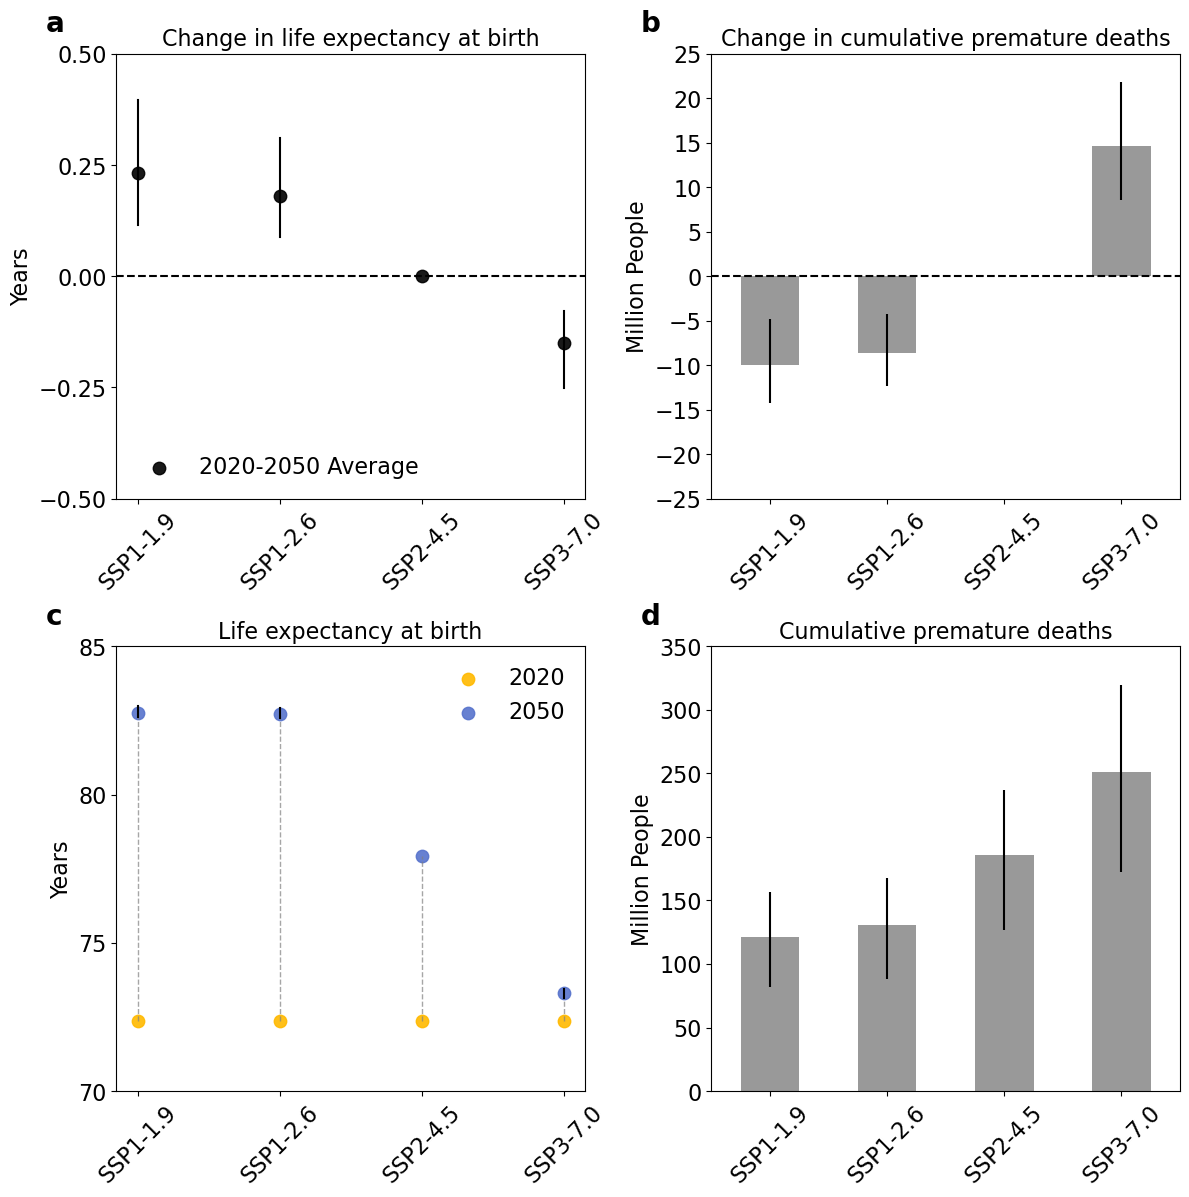

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)

scenario_order = ['SSP1-1.9', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0'] 


axes[1, 0].scatter(
    leab_global_combined['Scenario'], leab_global_combined['weighted_ex.new_AVG_2020'],
    color='#FFB900FF', label='2020', s=80, alpha=0.9, marker='o'
)
axes[1, 0].scatter(
    leab_global_combined['Scenario'], leab_global_combined['weighted_ex.new_AVG_2050'],
    color='#5773CCFF', label='2050', s=80, alpha=0.9, marker='o'
)

for _, row in leab_global_combined.iterrows():
    axes[1, 0].plot(
        [row['Scenario'], row['Scenario']],
        [row['weighted_ex.new_AVG_2020'], row['weighted_ex.new_AVG_2050']],
        color='grey', linestyle='--', alpha=0.7, linewidth=1
    )

    axes[1, 0].plot(
        [row['Scenario'], row['Scenario']],
        [row['weighted_ex.new_LOW'], row['weighted_ex.new_HIGH']],
        color='black', linestyle='-', alpha=1, linewidth=1.5
    )
axes[1, 0].set_title('Life expectancy at birth', fontsize=16)
axes[1, 0].set_ylabel('Years', fontsize=16)
axes[1, 0].legend(loc='upper right', frameon=False, fontsize=16, ncol=1)
axes[1, 0].tick_params(axis='x', labelsize=16, rotation=45)
axes[1, 0].tick_params(axis='y', labelsize=16)
axes[1, 0].set_yticks(np.arange(70, 86, step=5))


axes[0, 0].scatter(
    leab_global_avg_diff['Scenario'], leab_global_avg_diff['avg_ex_diff_AVG'],
    color='black', label='2020-2050 Average', s=80, alpha=0.9, marker='o'
)

for _, row in leab_global_avg_diff.iterrows():

    axes[0, 0].plot(
            [row['Scenario'], row['Scenario']],
            [row['avg_ex_diff_LOW'], row['avg_ex_diff_HIGH']],
            color='black', linestyle='-', alpha=1, linewidth=1.5
        )

axes[0, 0].axhline(y=0, color='black', linestyle='--', linewidth=1.5)
axes[0, 0].set_ylabel('Years', fontsize=16)
axes[0, 0].tick_params(axis='x', labelsize=16, rotation=45)
axes[0, 0].tick_params(axis='y', labelsize=16)
axes[0, 0].set_title('Change in life expectancy at birth', fontsize=16)
axes[0, 0].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[0, 0].legend(loc='lower left', frameon=False, fontsize=16, ncol=1)

x = np.arange(len(change_cumu_deaths_fill['Scenario'].unique()))
pivot_data = change_cumu_deaths_fill.pivot_table(index='Scenario', values='total_delta_mort_AVG_adjusted', aggfunc='sum').div(1e3)

pivot_data.plot(kind='bar', stacked=True, color='#999999', legend=None, ax=axes[1, 1])
x_values = pivot_data['total_delta_mort_AVG_adjusted']
x_err_lower = x_values - change_cumu_deaths_fill.pivot_table(index='Scenario', values='total_delta_mort_LOW_adjusted', aggfunc='sum').div(1e3)['total_delta_mort_LOW_adjusted']
x_err_upper = change_cumu_deaths_fill.pivot_table(index='Scenario', values='total_delta_mort_HIGH_adjusted', aggfunc='sum').div(1e3)['total_delta_mort_HIGH_adjusted'] - x_values

yerr = np.vstack([x_err_lower, x_err_upper])

axes[1, 1].errorbar(
    x, x_values,
    yerr=yerr,
    fmt='none', color='black', linewidth=1.5
)

axes[1, 1].set_title('Cumulative premature deaths', fontsize=16)
axes[1, 1].set_ylabel('Million People', fontsize=16)
axes[1, 1].set_ylim(0, 350)
axes[1, 1].tick_params(axis='y', labelsize=16)
axes[1, 1].tick_params(axis='x', labelsize=16)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(scenario_order, fontsize=16, rotation=45)
axes[1, 1].set_xlabel(None)  # Cancel x-axis label

x = np.arange(len(change_cumu_deaths_fill['Scenario'].unique()))
pivot_data = change_cumu_deaths_fill.pivot_table(
    index='Scenario', values='total_delta_mort_AVG_diff', aggfunc='sum'
).div(1e3).reindex(scenario_order)

pivot_data.plot(kind='bar', stacked=True, color='#999999', legend=None, ax=axes[0, 1])
x_values = pivot_data['total_delta_mort_AVG_diff']
x_err_lower = x_values - change_cumu_deaths_fill.pivot_table(
    index='Scenario', values='total_delta_mort_LOW_diff', aggfunc='sum'
).div(1e3).reindex(scenario_order)['total_delta_mort_LOW_diff']
x_err_upper = change_cumu_deaths_fill.pivot_table(
    index='Scenario', values='total_delta_mort_HIGH_diff', aggfunc='sum'
).div(1e3).reindex(scenario_order)['total_delta_mort_HIGH_diff'] - x_values

yerr = np.vstack([np.abs(x_err_lower), np.abs(x_err_upper)])

axes[0, 1].errorbar(
    x, x_values,
    yerr=yerr,
    fmt='none', color='black',  linewidth=1.5
)

axes[0, 1].set_title('Change in cumulative premature deaths', fontsize=16)
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=1.5)
axes[0, 1].set_ylabel('Million People', fontsize=16)
axes[0, 1].set_ylim(-25, 20)
axes[0, 1].set_yticks(np.arange(-25, 26, step=5))
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(scenario_order, fontsize=16)
axes[0, 1].tick_params(axis='y', labelsize=16)
axes[0, 1].tick_params(axis='x', labelsize=16, rotation=45)
axes[0, 1].set_xlabel(None)

axes[0, 0].text(-0.15, 1.1, 'a', transform=axes[0, 0].transAxes,fontsize=20, weight='bold', va='top', ha='left')
axes[0, 1].text(-0.15, 1.1, 'b', transform=axes[0, 1].transAxes,fontsize=20,  weight='bold', va='top', ha='left')
axes[1, 0].text(-0.15, 1.1, 'c', transform=axes[1, 0].transAxes,fontsize=20, weight='bold', va='top', ha='left')
axes[1, 1].text(-0.15, 1.1, 'd', transform=axes[1, 1].transAxes,fontsize=20,  weight='bold', va='top', ha='left')


plt.subplots_adjust(hspace=0.5, wspace=0.5) 
fig.tight_layout()
plt.show()

# Figure S - Life Expectancy at 65

In [10]:
lea65 = pd.read_csv('/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu et al code and dataset /Code&Data for results/Data/Health outcomes/Life Expectancy/lea65.csv')

lea65 = lea65.merge(pop_all,on=['scen', 'Time', 'iso_code','sex'],how='left')

lea65

,scen,Time,sex,agest,iso_code,Scenario,ex,ex.new_AVG,ex.new_LOW,ex.new_HIGH,ex_diff_AVG,ex_diff_LOW,ex_diff_HIGH,Population_total
0,SSP1,2020.0,f,65,AFG,ssp119,12.806600,12.806591,12.806591,12.806591,-0.000009,-0.000009,-0.000009,18957.4
1,SSP1,2025.0,f,65,AFG,ssp119,13.636538,13.755584,13.691248,13.852481,0.119046,0.054709,0.215942,21676.2
2,SSP1,2030.0,f,65,AFG,ssp119,14.120071,14.219580,14.163655,14.304873,0.099509,0.043584,0.184802,24380.3
3,SSP1,2035.0,f,65,AFG,ssp119,14.339448,14.412100,14.370746,14.476906,0.072652,0.031298,0.137458,26966.3
4,SSP1,2040.0,f,65,AFG,ssp119,14.581953,14.722925,14.640171,14.857811,0.140973,0.058218,0.275858,29377.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10491,SSP3,2030.0,m,65,ZWE,ssp370,12.252146,12.227949,12.242701,12.207139,-0.024196,-0.009445,-0.045007,8882.4
10492,SSP3,2035.0,m,65,ZWE,ssp370,12.315409,12.308362,12.312673,12.302729,-0.007047,-0.002736,-0.012681,9673.0
10493,SSP3,2040.0,m,65,ZWE,ssp370,12.345012,12.304850,12.329984,12.270100,-0.040162,-0.015028,-0.074912,10454.4
10494,SSP3,2045.0,m,65,ZWE,ssp370,12.399749,12.326203,12.373016,12.259420,-0.073546,-0.026733,-0.140328,11188.4


In [11]:
lea65_global_2020 = lea65[lea65['Time'] == 2020].groupby(['Scenario']).apply(
    lambda group: pd.Series({
        'weighted_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),

    })
).reset_index()

lea65_global_2050 = lea65[lea65['Time'] == 2050].groupby(['Scenario']).apply(
    lambda group: pd.Series({
        'weighted_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_LOW': (group['ex.new_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_HIGH': (group['ex.new_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum(),

    })
).reset_index()

lea65_global_diff = lea65[lea65['Time'] == 2050].groupby(['Scenario']).apply(
    lambda group: pd.Series({
        'weighted_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_LOW': (group['ex.new_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_HIGH': (group['ex.new_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum(),
    })
).reset_index()

lea65_global_combined = pd.merge(
    lea65_global_2020, lea65_global_2050, 
    on=['Scenario'], 
    suffixes=('_2020', '_2050')
)

lea65_global_combined = lea65_global_combined.replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

lea65_global_combined


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_99344/909306859.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lea65_global_2020 = lea65[lea65['Time'] == 2020].groupby(['Scenario']).apply(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_99344/909306859.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lea65_global_2050 = lea65[lea65['Time'] == 2050].groupby(['Scenario']).apply(


,Scenario,weighted_ex_2020,weighted_ex.new_AVG_2020,weighted_ex_2050,weighted_ex.new_AVG_2050,weighted_ex.new_LOW,weighted_ex.new_HIGH
0,SSP1-1.9,15.7079,15.7079,21.240765,21.478882,21.347187,21.690281
1,SSP1-2.6,15.7079,15.7079,21.240765,21.449484,21.334680,21.630435
2,SSP2-4.5,15.7079,15.7079,18.796520,18.796520,18.796520,18.796520
3,SSP3-7.0,15.7079,15.7079,16.940351,16.746507,16.848174,16.596504


In [12]:
lea65_global_avg_diff = lea65.groupby(['Scenario','Time']).apply(
    lambda group: pd.Series({
        'avg_ex_diff_AVG': (group['ex_diff_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'avg_ex_diff_LOW': (group['ex_diff_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'avg_ex_diff_HIGH': (group['ex_diff_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum(),
    })
).reset_index().groupby(['Scenario'])[['avg_ex_diff_AVG','avg_ex_diff_LOW','avg_ex_diff_HIGH']].mean().reset_index().replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

lea65_global_avg_diff


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_99344/713781906.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lea65_global_avg_diff = lea65.groupby(['Scenario','Time']).apply(


,Scenario,avg_ex_diff_AVG,avg_ex_diff_LOW,avg_ex_diff_HIGH
0,SSP1-1.9,0.202315,0.104431,0.343512
1,SSP1-2.6,0.157553,0.080555,0.268805
2,SSP2-4.5,-0.000006,-0.000006,-0.000006
3,SSP3-7.0,-0.131907,-0.070025,-0.215911


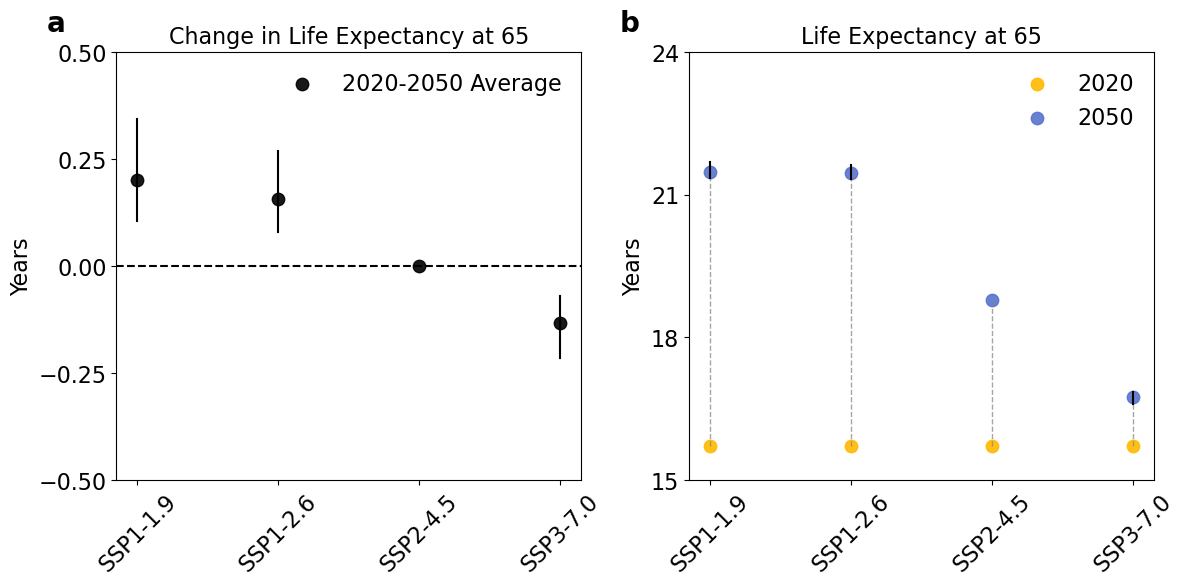

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

scenario_order = ['SSP1-1.9', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0']


axes[1].scatter(
    lea65_global_combined['Scenario'], lea65_global_combined['weighted_ex.new_AVG_2020'],
    color='#FFB900FF', label='2020', s=80, alpha=0.9, marker='o'
)
axes[1].scatter(
    lea65_global_combined['Scenario'], lea65_global_combined['weighted_ex.new_AVG_2050'],
    color='#5773CCFF', label='2050', s=80, alpha=0.9, marker='o'
)

for _, row in lea65_global_combined.iterrows():
    axes[1].plot(
        [row['Scenario'], row['Scenario']],
        [row['weighted_ex.new_AVG_2020'], row['weighted_ex.new_AVG_2050']],
        color='grey', linestyle='--', alpha=0.7, linewidth=1
    )
    axes[1].plot(
        [row['Scenario'], row['Scenario']],
        [row['weighted_ex.new_LOW'], row['weighted_ex.new_HIGH']],
        color='black', linestyle='-', alpha=1, linewidth=1.5
    )

axes[1].set_title('Life Expectancy at 65', fontsize=16)
axes[1].set_ylabel('Years', fontsize=16)
axes[1].legend(loc='upper right', frameon=False, fontsize=16, ncol=1)
axes[1].tick_params(axis='x', labelsize=16, rotation=45)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_yticks(np.arange(15, 25, step=3))

axes[0].scatter(
    lea65_global_avg_diff['Scenario'], lea65_global_avg_diff['avg_ex_diff_AVG'],
    color='black', label='2020-2050 Average', s=80, alpha=0.9, marker='o'
)

for _, row in lea65_global_avg_diff.iterrows():

    axes[0].plot(
            [row['Scenario'], row['Scenario']],
            [row['avg_ex_diff_LOW'], row['avg_ex_diff_HIGH']],
            color='black', linestyle='-', alpha=1, linewidth=1.5
        )

axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1.5)
axes[0].set_ylabel('Years', fontsize=16)
axes[0].tick_params(axis='x', labelsize=16, rotation=45)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].set_title('Change in Life Expectancy at 65', fontsize=16)
axes[0].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[0].legend(loc='upper right', frameon=False, fontsize=16, ncol=2)

axes[0].text(-0.15, 1.1, 'a', transform=axes[0].transAxes,fontsize=20,weight='bold',  va='top', ha='left')
axes[1].text(-0.15, 1.1, 'b', transform=axes[1].transAxes,fontsize=20, weight='bold',  va='top', ha='left')

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
fig.tight_layout()
plt.show()

